<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Business Understanding</span></b> </div>
East African Breweries Limited (EABL) has a rich history rooted in East Africa's economic and social fabric. Established in 1922, EABL has grown to become a leading beverage company, contributing significantly to the region's economy. Over the years, EABL has built a portfolio of iconic brands, becoming synonymous with quality and innovation in the brewing industry.EABL holds a pivotal role in the East African beverage market, offering a diverse range of alcoholic and non-alcoholic products. Its flagship brands, including Tusker Lager and Guinness, have become household names, reflecting the company's commitment to quality craftsmanship.

Despite its historical success, East African Breweries Limited (EABL) has been facing significant challenges in the form of evolving regulatory landscapes. The recent government's directive to collect taxes within 24 hours after goods leave the store, influenced by the new Finance Act of 2023, has introduced a new layer of complexity. This has prompted investors and stakeholders to reevaluate their strategies in light of the changing regulatory landscape. To navigate this uncertainty, our goal is to provide investors with a comprehensive analysis and forecasting model for EABL's stock prices, incorporating various economic indicators and sentiments.

### <b> <span style='color:#16C2D5'>|</span> Problem statement</b>
The dynamic regulatory environment and recent government directives have created uncertainty in the market, affecting EABL's stock performance. Investors are seeking ways to cushion themselves from potential market crashes and make informed decisions in the face of evolving economic conditions. To address this, we aim to develop a multifaceted analysis, including time series forecasting, sentiment analysis, volatility insights, abnormal trade volume investigation, dividends analysis, trend analysis, and lag analysis of market indicators.

### <b> <span style='color:#16C2D5'>|</span> Objectives</b>
1. **Time Series Forecasting:**
Objective: Develop an accurate time series forecasting model for EABL's stock prices. Incorporate Twitter(Stocks) sentiments, inflation rates, exchange rates, yearly unemployment rates, and EABL dividends payout.

2. **Sentiment Analysis:**
Objective 1: Perform a sentiment analysis of EABL products as well as market sentiments (Twitter).
Objective 2: Conduct sentiment analysis on news articles and Instagram.
Objective 3: Identify key sentiment drivers.

3. **Viability Assessment:**
Objective 1: Uncover EABL's stock volatility patterns for risk assessment.
Objective 2: Develop a risk model to identify and quantify potential risks for managing investment strategies.
Objective 3: Investigate abnormal trade volume spikes and analyze their causes and implications.

4. **Dividends Analysis:**
Objective: Analyze the rates of EABL dividends payout.

5. **Trend Analysis:**
Objective: Analyze trends, seasonality, and autocorrelation patterns in EABL stock data.

6. **Lag Analysis:**
Objective: Analyze the lag effects of market indicators (inflation rates, GDP, USD exchange rates, unemployment rates) on EABL stocks.


### <b> <span style='color:#16C2D5'>|</span> Possible challenges</b>
1. Regulatory Uncertainty: The recent changes in tax collection directives pose a challenge for EABL's financial stability. Understanding and predicting the impact of these changes on stock prices is challenging but crucial.

2. Data Integration: Incorporating diverse data sources like Twitter sentiments, inflation rates, exchange rates, unemployment rates, and dividends payout requires efficient data integration and cleaning to ensure the accuracy and reliability of the analysis.

3. Sentiment Analysis: Analyzing sentiments from various sources (Twitter, news articles, Instagram) poses the challenge of dealing with unstructured data and ensuring that sentiments are accurately captured and interpreted.

4. Market Volatility: Predicting stock prices and identifying potential risks related to EABL's stock volatility demands a robust model capable of handling the inherent unpredictability in financial markets.

5. Complexity of Market Indicators: Understanding the lag effects of market indicators such as inflation rates, GDP, USD exchange rates, and unemployment rates on EABL stocks requires a sophisticated analytical approach.

6. Scanty data on market indicators(Quartely market indicators)

7. Limited market sentiment data(Twitter)

### <b> <span style='color:#16C2D5'>|</span> Conclusion</b>
In conclusion, EABL's current challenges necessitate a comprehensive approach to provide investors with the insights needed to make informed decisions. By combining traditional financial indicators with emerging data sources and advanced analytics, we aim to offer a holistic view of the market dynamics surrounding EABL. The analysis will not only address current uncertainties but also equip investors with tools to anticipate and navigate future trends in the stock market.

In [52]:
# Data manipulation libraries
import pandas as pd 
import numpy as np
from numpy.polynomial.polynomial import Polynomial
 
# visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from pandas.plotting import autocorrelation_plot


# statistical libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import pearsonr 
# machine learning libraries
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import r2_score 


#Finance visualization libraries. 
from ta.volatility import AverageTrueRange
import mplfinance as mpf

#Sentiment analysis libraries. 
import re  
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

# Hypothesis Testing (Example: t-test for Dividend Yield)
from scipy.stats import ttest_ind

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Data Understanding</span></b> </div>

In [2]:
# Load the final_merge.csv file into a Pandas DataFrame.
df = pd.read_csv("MergedData/final_merge.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment,Interest rates
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,NaN,NaN,3.7,12.5
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,NaN,NaN,3.7,12.5
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,NaN,NaN,3.7,12.5
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,NaN,NaN,3.7,12.5
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,NaN,NaN,3.7,12.5


In [3]:
# Check the summary informartion of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4353 non-null   int64  
 1   Date                      4353 non-null   object 
 2   Open                      4353 non-null   float64
 3   High                      4353 non-null   float64
 4   Low                       4353 non-null   float64
 5   Close                     4353 non-null   float64
 6   Average                   4353 non-null   float64
 7   Volume                    4353 non-null   int64  
 8   Month                     4353 non-null   int64  
 9   Year                      4353 non-null   int64  
 10  Day                       4353 non-null   int64  
 11  Annual Average Inflation  4332 non-null   float64
 12  12-Month Inflation        4353 non-null   float64
 13  Mean                      4349 non-null   float64
 14  Amount  

In [4]:
#Check the datatypes of the columns. 
df.dtypes

Unnamed: 0                    int64
Date                         object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Average                     float64
Volume                        int64
Month                         int64
Year                          int64
Day                           int64
Annual Average Inflation    float64
12-Month Inflation          float64
Mean                        float64
Amount                      float64
Dividends per share         float64
Earnings Per Share          float64
Unemployment                float64
Interest rates              float64
dtype: object

In [5]:
# Check for missing values.
df.isna().sum()

Unnamed: 0                   0
Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Average                      0
Volume                       0
Month                        0
Year                         0
Day                          0
Annual Average Inflation    21
12-Month Inflation           0
Mean                         4
Amount                       0
Dividends per share         20
Earnings Per Share          21
Unemployment                 0
Interest rates               0
dtype: int64

In [6]:
#Drop the annual inflation column to only remain with the monthly inflation.
df.drop(columns=['Annual Average Inflation'], inplace=True)

* **Date:** The date of the stock data (object type, which we'll convert to datetime for time series analysis).

* **Open, High, Low, Close, Average(float64):** Stock prices at the open, high, low, and close of the trading day, along with the average price.

* **Volume(int64):** The daily number of shares traded.

* **Month, Year, Day(int64):** Components of the date.

* **Annual Average Inflation:** Not provided in the sample data (float64, contains NaNs).

* **Mean(float64):** Average daily exchange rates.

* **Amount(float64):** Interim and Final Dividends announcements amounts.

* **Dividends per share(float64):** Dividend payout per share. This column has missing values because **EABL** has not yet announced the payout for every dividend. 

* **Earnings Per Share(float64, contains NaNs for January 2024)**: The portion of a company's profit allocated to each outstanding share of common stock which serves as a profitability indicator. The missing values are present because no information is provided regarding the Earnings per share in January. 

* **Unemployment(float64, contains NaNs for January 2024):** Contains information about quarterly unemployment rates. The missing values will be handled by filling them with the january report about unemployment rates from news outlets. 

In [7]:
# Print out the column names. 
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Average',
       'Volume', 'Month', 'Year', 'Day', '12-Month Inflation', 'Mean',
       'Amount', 'Dividends per share', 'Earnings Per Share', 'Unemployment',
       'Interest rates'],
      dtype='object')

In [8]:
# Check out shape of the dataframe. 
df.shape

(4353, 18)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Data Preprocessing and EDA</span></b> </div>

1. Handling missing values from the **Earnings per share columns** and **Dividends payout** using the backfill method. This method is used because of the assumption the pay-outs won't change to a greater degree. 

2. Convert the date column to a datetime formart. 

3. Engineer new features for **Earnings per share** and **Dividends per share** analysis. 

4. Rename column **Amount** to **Amount_Announced** because it contains the amounts for interim dividends pay-outs.


In [29]:
# Create a copy of the original dataframe.
df_eda = df.copy()
# Fill missing values for the mean exchange rate column with the previous value. 
df_eda['Mean'].fillna(method='ffill', inplace=True)
df_eda[['Dividends per share','Earnings Per Share']] = df_eda[['Dividends per share','Earnings Per Share']].fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_18484\1659259753.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18484\1659259753.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_eda['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18484\1659259753.py:5: FutureWarning: DataFrame.fillna with 'method' is 

In [30]:
df_eda.head()

,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment,Interest rates
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,6.9,161.0,1.00,5.5,12.5,3.7,12.5
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,6.9,161.0,1.00,5.5,12.5,3.7,12.5
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,6.9,162.0,1.00,5.5,12.5,3.7,12.5
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,6.9,162.0,1.00,5.5,12.5,3.7,12.5
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,6.9,163.0,1.75,5.5,12.5,3.7,12.5


In [31]:
#Convert to datetime formart. 
df_eda['Date'] = pd.to_datetime(df_eda['Date'])

In [32]:
df_eda.isna().sum()

Unnamed: 0             0
Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Average                0
Volume                 0
Month                  0
Year                   0
Day                    0
12-Month Inflation     0
Mean                   0
Amount                 0
Dividends per share    0
Earnings Per Share     0
Unemployment           0
Interest rates         0
dtype: int64

In [35]:
# Rename the column 'Amount' to 'Amount_announced' in the DataFrame df.
df_eda.rename(columns={'Amount':'Amount_announced'}, inplace=True)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Volatility Analysis</span></b> </div>
Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. We'll calculate the historical volatility of EABL's stock, using the standard deviation of daily returns as a proxy for volatility.

Use of the tool **Average True Range** to calculate and analyze volatility.

For this purpose, we need to:
* Calculate the daily returns of EABL's stock.
* Define and implement a method to calculate the rolling standard deviation of these returns, which represents the volatility.
* Visualize the volatility over time to identify any patterns or trends.

Annualized Volatility: 34.83%


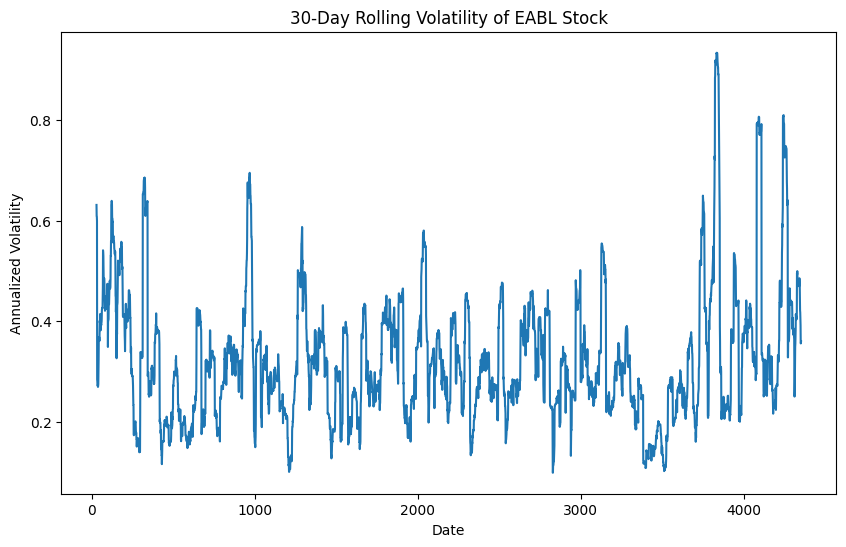

In [36]:
class StockVolatility:
    def __init__(self, data):
        self.data = data
        self.returns = None
    
    def calculate_returns(self):
        """Calculate daily returns from the Close prices."""
        self.data['Returns'] = self.data['Close'].pct_change()
        self.returns = self.data['Returns']
    
    def calculate_volatility(self):
        """Calculate the annualized volatility of the stock."""
        daily_volatility = self.returns.std()
        annualized_volatility = daily_volatility * np.sqrt(252)  # Assuming 252 trading days in a year
        return annualized_volatility
    
    def plot_volatility(self):
        """Plot the rolling 30-day volatility of the stock."""
        rolling_volatility = self.returns.rolling(window=30).std() * np.sqrt(252)
        plt.figure(figsize=(10, 6))
        rolling_volatility.plot()
        plt.title('30-Day Rolling Volatility of EABL Stock')
        plt.xlabel('Date')
        plt.ylabel('Annualized Volatility')
        plt.show()

# Instantiate the StockVolatility class and perform the analysis
eabl_volatility = StockVolatility(df_eda)
eabl_volatility.calculate_returns()

# Calculate and display the annualized volatility
annualized_volatility = eabl_volatility.calculate_volatility()
print(f"Annualized Volatility: {annualized_volatility:.2%}")

# Plot the 30-day rolling volatility
eabl_volatility.plot_volatility()

### <b> <span style='color:#16C2D5'>|</span> Observations</b> 
The average volatility rate for EABL's stock over the period analyzed is approximately 34.83%. This rate indicates the average level of fluctuation in the stock's daily returns on an annualized basis, reflecting the stock's risk profile. A volatility rate of this magnitude suggests that EABL's stock has experienced moderate to high levels of price fluctuations, which is a crucial factor for investors to consider in their risk assessment and investment strategy. ​​

### <b> <span style='color:#16C2D5'>|</span> Insights</b> 
* **For Risk-Averse Investors:** Given the relatively high volatility of EABL's stock, more cautious investors might prefer to look for lower-volatility investment opportunities unless they are comfortable with the associated risk levels.

* **For Risk-Tolerant Investors:** Those willing to accept higher volatility in exchange for the potential of significant gains might find EABL's stock to be an attractive option. However, it is crucial to implement robust risk management strategies, such as diversification and setting stop-loss orders.

* **Market Timing:** Investors might also use volatility trends to time their market entry and exit. Periods of increasing volatility could signal opportunities for high returns, but they should be approached with caution and a clear understanding of potential downside risks.

The analysis of EABL's stock volatility reveals a substantial level of risk, characterized by the potential for significant price fluctuations. Investors should consider their risk tolerance and investment horizon when deciding to invest in EABL stocks. By understanding and planning for volatility, investors can better position themselves to navigate the uncertainties of the stock market and capitalize on potential opportunities. ​

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Trend analysis</span></b> </div>
For the Trend Analysis of East African Breweries Limited (EABL)'s stock, we will examine the historical price data to identify any prevailing trends, seasonal patterns, and any potential autocorrelation in the stock prices over time. Understanding these aspects can help in forecasting future price movements and in making informed investment decisions.

To conduct this analysis, we will use the TrendAnalysis class with methods for:

* **Trend Detection:** Identify long-term movements in the stock prices.
* **Seasonality Analysis:** Examine the data for regular, repeating patterns that occur over a known period.
* **Autocorrelation Analysis:** Determine if the stock prices are correlated with their past values, which can be useful for predictive modeling.

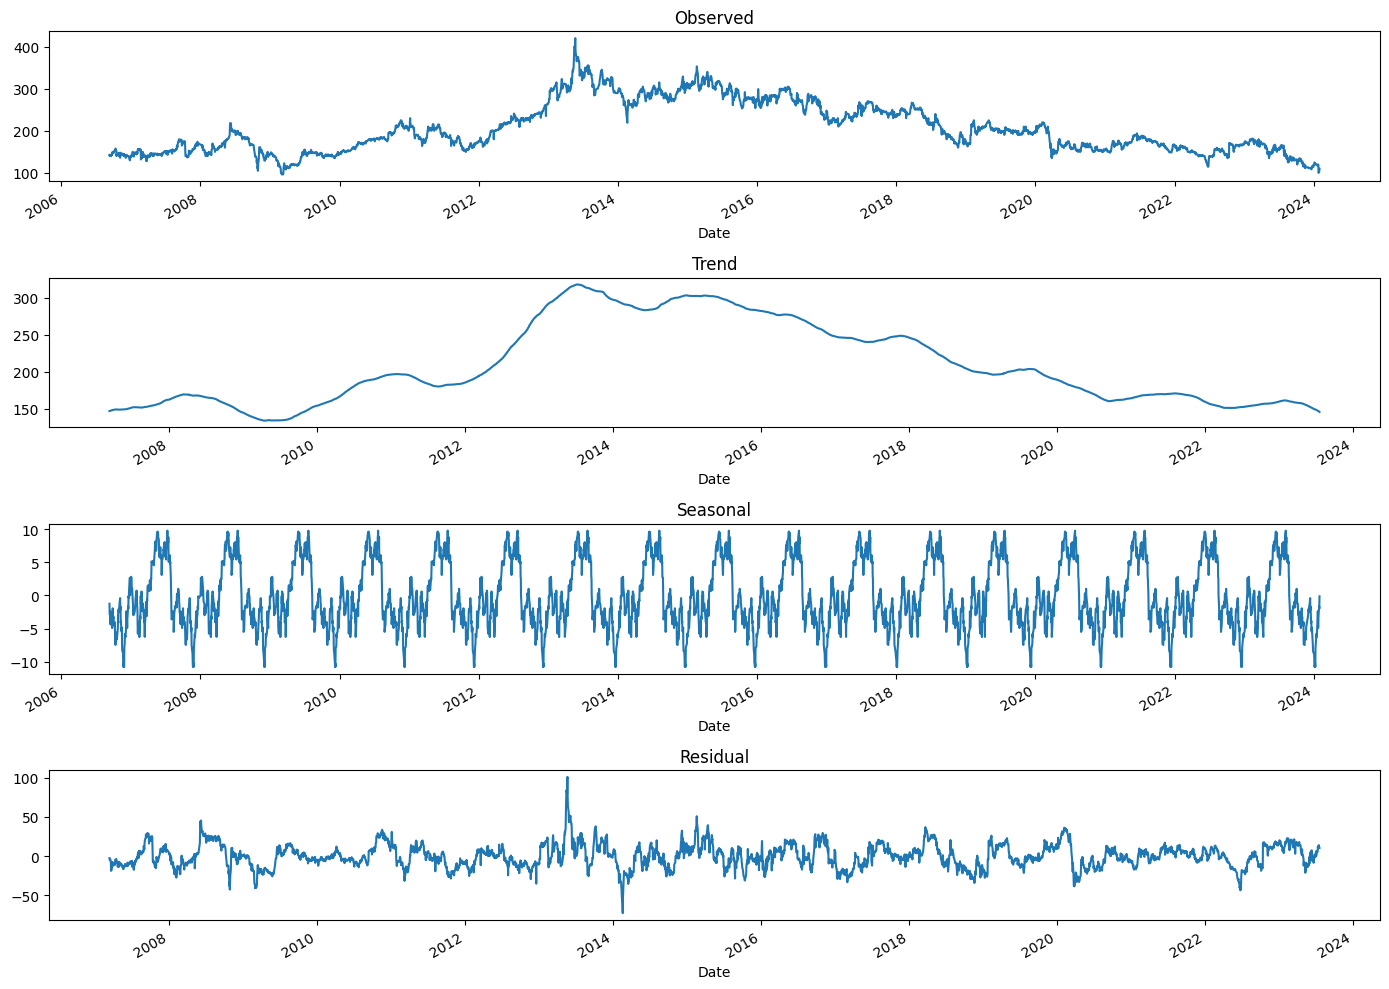

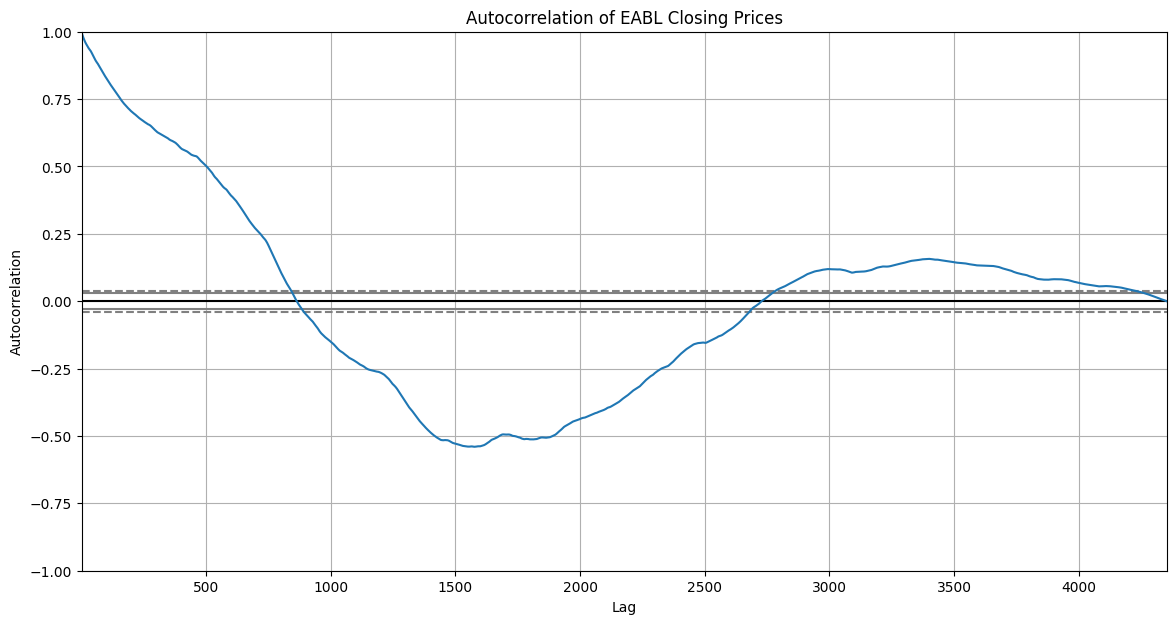

In [44]:
class TrendAnalysis:
    """
    A class to perform trend analysis on stock prices.
    """
    def __init__(self, data):
        self.data = data.copy()
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data.set_index('Date', inplace=True)
        
    def decompose_series(self, model='additive'):
        """
        Decompose the time series into its trend, seasonal, and residual components.
        """
        # Assuming 'Close' price for analysis and a frequency of 252 trading days per year
        decomposition = seasonal_decompose(self.data['Close'], model=model, period=252)
        return decomposition
    
    def plot_decomposition(self, decomposition):
        """
        Plot the decomposed components of the time series.
        """
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
        decomposition.observed.plot(ax=ax1)
        ax1.set_title('Observed')
        decomposition.trend.plot(ax=ax2)
        ax2.set_title('Trend')
        decomposition.seasonal.plot(ax=ax3)
        ax3.set_title('Seasonal')
        decomposition.resid.plot(ax=ax4)
        ax4.set_title('Residual')
        plt.tight_layout()
    
    def plot_autocorrelation(self):
        """
        Plot the autocorrelation of the 'Close' price to identify any autocorrelation patterns.
        """
        plt.figure(figsize=(14, 7))
        autocorrelation_plot(self.data['Close'])
        plt.title('Autocorrelation of EABL Closing Prices')
        plt.show()

# Initialize the class with the cleaned data
trend_analysis = TrendAnalysis(df_eda)

# Decompose the series
decomposition = trend_analysis.decompose_series()

# Plotting the decomposition
trend_analysis.plot_decomposition(decomposition)

# Plotting the autocorrelation
trend_analysis.plot_autocorrelation()


### <b> <span style='color:#16C2D5'>|</span>Decomposition Analysis</b> 
*Observed:* The observed data shows fluctuations over the years with a noticeable decline in values after 2013.

* **Trend:** There is a clear upward trend until around 2013, after which there is a decline. This suggests EABL's stock had been increasing over time but has started to decrease recently.

* **Seasonal:** The seasonal component reveals any repeating patterns or cycles in the stock prices over a specified period. In this case, the analysis aimed to uncover any monthly or quarterly patterns, but the visualization suggests that seasonality may not be a dominant feature in EABL's stock price movements.

* **Residual:** Residuals are relatively stable with some spikes indicating instances where the price significantly deviated from the trend and seasonal components.

### <b> <span style='color:#FFA500'>|</span>Auto Correlation Analysis</b> 
The autocorrelation plot indicates how the stock's closing prices correlate with its past values. Peaks in the plot suggest that the stock prices have some degree of predictability based on their past values. In this case, the autocorrelation plot shows a gradual decline, suggesting that past prices have some influence on future prices, but this influence diminishes over time.


### <b> <span style='color:#800000'>|</span>Observation</b> 
* **Trend Identification:** Understanding the long-term trend is crucial for making investment decisions, especially for buy-and-hold investors. The trend analysis suggests a direction that the stock might continue to follow.

* **Seasonality Insights:** While the analysis does not strongly indicate significant seasonality in EABL's stock prices, investors should still consider other cyclical factors that might affect the stock market in general.

* **Predictive Modeling:** The autocorrelation analysis provides a basis for developing predictive models. Stocks with significant autocorrelation can often be forecasted more accurately using past price data.

### <b> <span style='color:#008000'>|</span> Insights</b> 
* **Long-Term Investments:** Investors looking for long-term opportunities should pay close attention to the trend component to align their investment strategies with the overall direction of the stock.

* **Trading Strategies:** Traders might use autocorrelation insights to develop short-term trading strategies, capitalizing on the predictability of price movements.

* **Diversification:** The absence of strong seasonality suggests that EABL's stock might not offer diversification benefits based on seasonal trading strategies alone. Investors might need to look for other stocks or assets with clearer seasonal patterns for diversification purposes.

Investigate the causes of the decline post-2013 and develop strategies to mitigate or reverse this trend.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Trade Spike analysis</span></b> </div>

We'll focus on identifying and understanding instances where EABL's trading volume significantly deviates from its typical levels. Such spikes can indicate a variety of market conditions or events, such as new product launches, earnings reports, changes in management, or broader economic news impacting the stock.

Detecting these spikes can provide valuable insights into potential market sentiment changes or upcoming volatility

We'll use a z-score approach to identify outliers in trading volumes. The z-score measures the number of standard deviations an element is from the mean. Typically, a z-score above 2 or below -2 is considered abnormal.

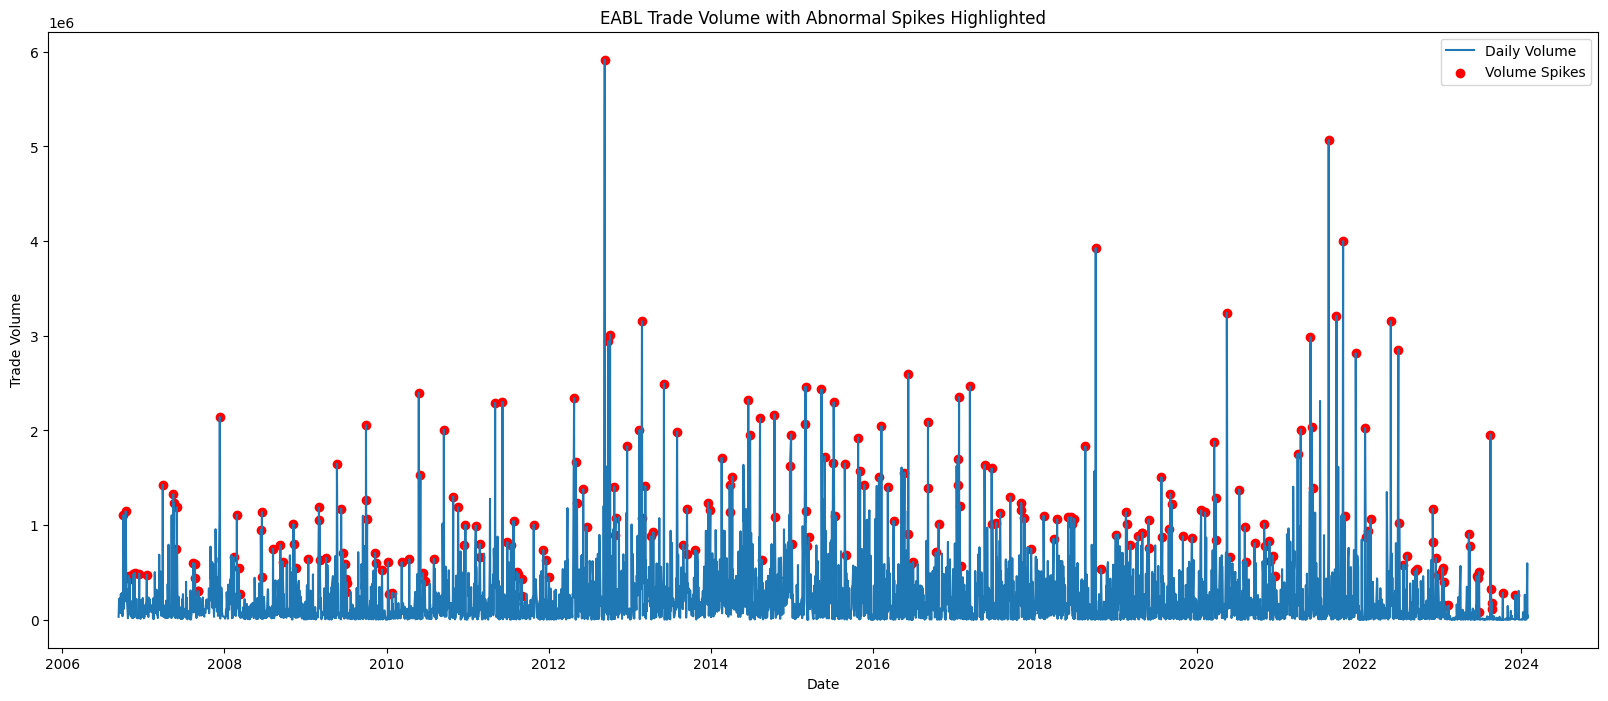

,Date,Volume,Z_Score
34,2023-12-07,264300,2.702999
67,2023-10-11,283900,4.484862
102,2023-08-22,180600,5.088448
103,2023-08-21,117600,2.647330
104,2023-08-18,326300,4.399954
...,...,...,...
4307,2006-11-16,480300,2.563505
4319,2006-10-31,433800,2.375978
4321,2006-10-27,464500,2.273895
4329,2006-10-13,1145100,4.094252


In [42]:
class TradeVolumeAnalysis:
    def __init__(self, data):
        self.data = data
    
    def detect_spikes(self, threshold=2):
        """Identify days with abnormal trade volume spikes.
        
        Args:
            threshold (float): The number of standard deviations from the mean to consider a spike.
        
        Returns:
            DataFrame: A subset of the original DataFrame with only the days of abnormal volume spikes.
        """
        self.data['Volume_Mean'] = self.data['Volume'].rolling(window=30).mean()
        self.data['Volume_Std'] = self.data['Volume'].rolling(window=30).std()
        self.data['Z_Score'] = (self.data['Volume'] - self.data['Volume_Mean']) / self.data['Volume_Std']
        
        # Filter rows where the Z-score is above the threshold
        spikes = self.data[self.data['Z_Score'] > threshold]
        return spikes
    
    def plot_volume_spikes(self):
        """Plot the daily trade volume with highlights on days of abnormal spikes."""
        plt.figure(figsize=(20, 8))
        plt.plot(self.data['Date'], self.data['Volume'], label='Daily Volume')
        
        # Detect spikes
        spikes = self.detect_spikes()
        
        plt.scatter(spikes['Date'], spikes['Volume'], color='red', label='Volume Spikes')
        plt.title('EABL Trade Volume with Abnormal Spikes Highlighted')
        plt.xlabel('Date')
        plt.ylabel('Trade Volume')
        plt.legend()
        plt.show()

        return spikes

# Instantiate the TradeVolumeAnalysis class and perform the analysis
volume_analysis = TradeVolumeAnalysis(df_eda)
spikes_df = volume_analysis.plot_volume_spikes()

# Display the dates and volumes of detected spikes for review
sorted_spikes = pd.DataFrame(spikes_df[['Date', 'Volume', 'Z_Score']].sort_values(by='Date', ascending=False))
sorted_spikes

### <b> <span style='color:#16C2D5'>|</span> Observations</b> 
The analysis highlighted several dates with abnormal trade volume spikes for EABL's stock, where the trade volume significantly exceeded the average, based on a Z-score threshold of 2. 

Notable abnormal trade volumes spikes were detected at:

* Months of August 2023. 
* Months of November 2006.

### <b> <span style='color:#FFA500'>|</span> Rationale</b> 
Trade volume spikes can result from a variety of causes, including but not limited to:

* **Corporate news or events:** Announcements related to earnings, mergers, acquisitions, or other significant corporate events.

* **Market sentiment:** Changes in investor sentiment due to broader market or economic news.

* **Institutional trading activity:** Large trades executed by institutional investors or hedge funds.

### <b> <span style='color:#008000'>|</span> Insights</b> 
* **Market Surveillance:** Investors and analysts should closely monitor news and events around the dates of these volume spikes to understand the underlying causes and potential market reactions.

* **Investment Strategy:** Abnormal volume days can sometimes precede significant price movements. Investors might use this information to adjust their investment strategies, potentially taking positions before expected moves or using the information to time exits.

* **Risk Assessment:** Sudden increases in trade volume, especially when not accompanied by significant news, might indicate speculative trading or manipulation. Investors should be cautious and conduct thorough research before making investment decisions based on volume spikes alone.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Dividend analysis</span></b> </div>

For the Dividends Analysis, we'll focus on understanding the trends and patterns in East African Breweries Limited (EABL)'s dividend payouts. Dividends are a critical component for investors, especially those seeking income from their investments. Analyzing the dividend history can provide insights into the company's profitability, stability, and management's confidence in future earnings.

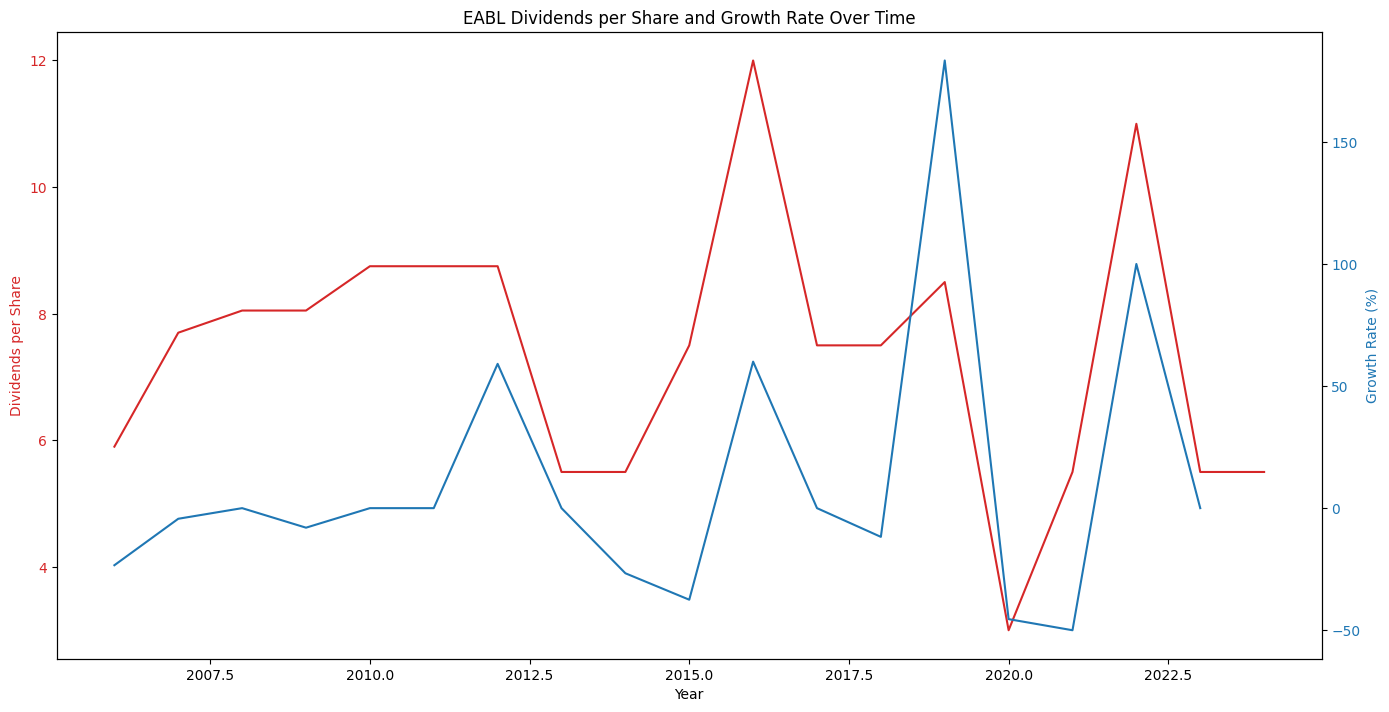

,Year,Dividends per share,Growth
0,2024,5.50,NaN
21,2023,5.50,0.000000
262,2022,11.00,100.000000
508,2021,5.50,-50.000000
759,2020,3.00,-45.454545
1012,2019,8.50,183.333333
1282,2018,7.50,-11.764706
1532,2017,7.50,0.000000
1779,2016,12.00,60.000000
2027,2015,7.50,-37.500000


In [43]:
class DividendsAnalysis:
    """
    A class for analyzing dividend payout trends.
    """
    def __init__(self, data):
        self.data = data
        # Ensure there's a 'Year' column for annual analysis
        if 'Year' not in self.data.columns:
            self.data['Date'] = pd.to_datetime(self.data['Date'])
            self.data['Year'] = self.data['Date'].dt.year
        self.dividend_data = self.data[['Year', 'Dividends per share']].drop_duplicates().dropna()
        
    def calculate_dividend_growth(self):
        """
        Calculate the year-over-year growth rate of dividends per share.
        """
        self.dividend_data['Growth'] = self.dividend_data['Dividends per share'].pct_change() * 100
        return self.dividend_data
    
    def plot_dividend_trends(self):
        """
        Visualize the trends in dividend payouts over time, including growth rates.
        """
        fig, ax1 = plt.subplots(figsize=(14, 7))

        color = 'tab:red'
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Dividends per Share', color=color)
        ax1.plot(self.dividend_data['Year'], self.dividend_data['Dividends per share'], color=color, label='Dividends per Share')
        ax1.tick_params(axis='y', labelcolor=color)
        
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel('Growth Rate (%)', color=color)  # we already handled the x-label with ax1
        ax2.plot(self.dividend_data['Year'], self.dividend_data['Growth'], color=color, label='Growth Rate')
        ax2.tick_params(axis='y', labelcolor=color)
        
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.title('EABL Dividends per Share and Growth Rate Over Time')
        plt.show()

# Initialize the class with the cleaned data (assuming data_cleaned is the dataset to use)
dividends_analysis = DividendsAnalysis(df_eda)

# Calculate dividend growth rates
dividend_growth_data = dividends_analysis.calculate_dividend_growth()

# Plotting dividend trends and growth rates
dividends_analysis.plot_dividend_trends()

# Displaying the calculated growth rates for review
dividend_growth_data[['Year', 'Dividends per share', 'Growth']]

### <b> <span style='color:#16C2D5'>|</span> Observation</b> 
The analysis reveals fluctuating trends in EABL's dividends per share over the recent years, with significant growth seen in 2022 followed by a drop in 2023, and stabilization in 2024. Notably, there's an apparent discrepancy in 2024 with two entries, one indicating a continuation of the previous dividend rate (5.5) and another showing a drop to 0.0, which suggests a discontinuation or a special case affecting dividend payout.

### <b> <span style='color:#FFA500'>|</span> Rationale</b> 
* **Growth in 2022:** The doubling of dividends in 2022 could indicate strong financial performance or a strategic decision to return more capital to shareholders.

* **Drop in 2023:** The subsequent drop might reflect adjustments in financial strategy, a reallocation of profits towards growth investments, or a response to external economic pressures.

* **Situation in 2024:** The mixed signals in 2024 require further investigation. The record showing a dividend of 0 could be due to an error, a temporary suspension of dividends, or a placeholder until final decisions are made.

### <b> <span style='color:#008000'>|</span> Insights</b> 
* **Investment Consideration:** Investors should closely monitor EABL's financial reports and shareholder communications for insights into dividend policies and sustainability. The historical volatility in dividends suggests a need for caution, especially for those relying on dividend income.

* **Long-Term Strategy:** Given the fluctuations, a long-term perspective is advisable when incorporating EABL stocks into a portfolio. Consider the overall yield and the potential for capital appreciation.

* **Further Research:** The anomaly in 2024 warrants further investigation. This is however fuelled by the high inflation and interest rates and also high tax rates which saw the Tax man demand more. This resulted to the low interim divindend payment. 

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Correlation plot(Heatmap)</span></b> </div>

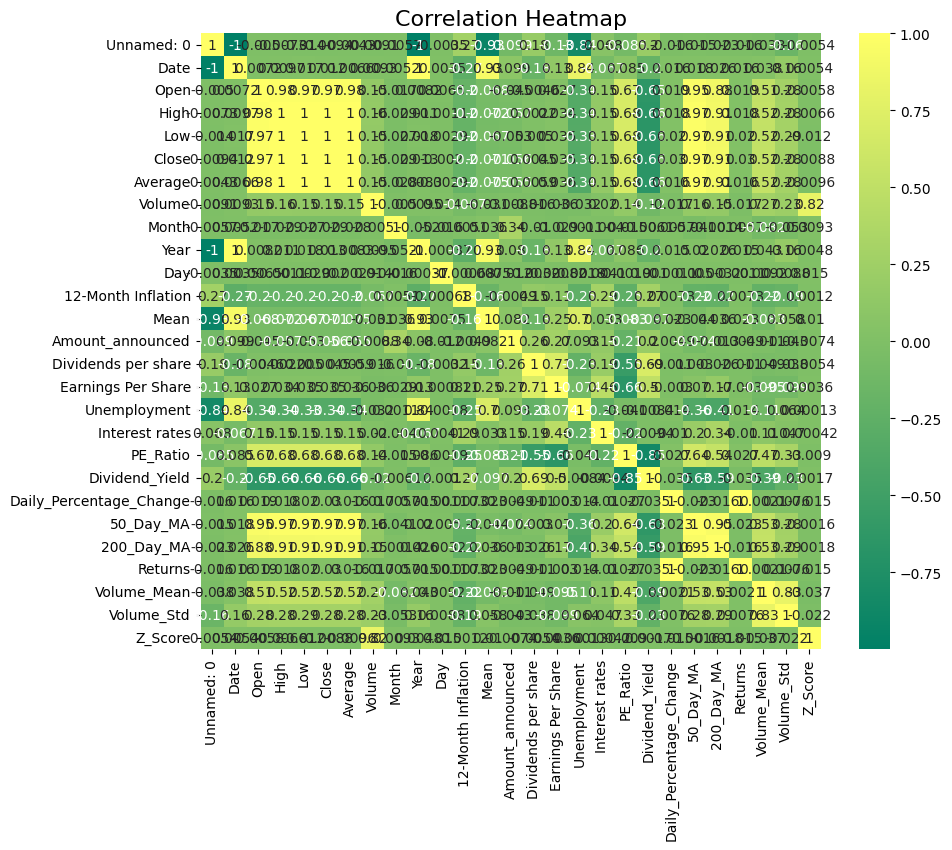

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_eda.corr(), cmap='summer', annot=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Sentiment analysis</span></b> </div>

Market sentiment may sometimes influence the pricing or rather value of stock prices. Product sentiments on the other hand influences how consumers use a brand by a company. This wholesomely genertaes more profits for a company because it means more users will buy a specific product. 

EABL has a foundations in East Africa which seeks to help the community at large in developing a sustainable future. This was achieved by running the **Tusker Project Fame** initiative which saw young East Africans given a chance to showcase their talents and win prizes thereafter. This initiative helped young people from shying away from their talents as well as keeping them busy to ensure the drug menace among youths is mitigated. 

Extracting and analyzing **Tusker project Fame** sentiments from consumers within the year 2006-2013 may have had an imapct of stock prices because it was a Corporate Social Responsibility initiative. This project made **EABL** gain more consumers and made inroads because it was a special show and a one of its kind in East and Central Africa. It attracted participants from out and beyond and generated alot of profits from the sale of their products. Their brand stood out this may have influenced some investors to view **EABL** more positively due to its commitment to social responsibility. These high income generating initiatives that resonates with people increases investor confidence and support. 

Analyzing **EABL FOUNDATION** sentiments and including them as predictors is also necessary as it may shape and directly influence how investors view the **EABL'S** future at large. This foundation has been on the forefront of championing for building a sustainable future by:
* sponsoring sports and football clubs.
* Offering university scholaships to needy students.
* Performing trainings to empower marginalised communities and women at large.
* Commissioning water projects in various counties within East Africa. 

These sentiments which allign with **UN Sustainable Development Goals** for a better future with the sole aim of conserving the environment, using renewable energy sources and supporting local communities attract investors and influence stock prices. The foundation is commited to lower carborn emissions by 2030 and has shown immense potential and interest towards these goals by commisioning biomass plants in almost all their plants. 

Environmental initiatives like this may be attractive to an investor when they believe they can generate the most profits from the investment. Investors may view these initiatives as a firmm's engagement in environmental activities for a better future as a method of attracting new customers and clients alike and increased competitiveness. 

Each firm or organization should prioritize the interests of stakeholders before embarking on any initiative. This is crucial because initiatives involving significant expenditure may result in reduced profitability, potentially deterring investors who prioritize financial returns. By aligning initiatives with stakeholder interests, companies can demonstrate responsible decision-making and mitigate concerns about future profitability, thereby fostering investor confidence and long-term sustainability.


### <b><span style='color:#16C2D5'>|</span> Merging sentiments</b> 

To perform a sentiment analysis, merging of dataframes to have a wholesome view of sentiments against the respective dates tweeted is very necessarry and essential. The date column for the twitter data is however in the UTC formart and may result to merge conflicts because the date column in the initial merged data is in normal formart. 

1. The columns should have the same column names.
2. The UTC TimeZone is removed using the datetime formula which localizes the date column. 
3. Localizing the date introduces time in the respective columns and to ensure the date columns do not have the time, the use of normalizing in datetime columns solves this efficiently. 
4. Final merged is performed and the sentiments appended to their respective dates alongside the retweets and likes which will be used to add the idea of weights when performing sentiment analysis. 

In [41]:
# Read in merged data and sentiments data for easier merging. 
df_origin = pd.read_csv('MergedData/final_merge.csv')
df_sentiments = pd.read_csv('merged_sentiments.csv')

In [42]:
# Rename columns for easier merging. 
df_sentiments.rename(columns={'date':'Date'}, inplace=True)

In [43]:
# remove the UTC time zone for twitter sentiments data. 
df_sentiments['Date'] = pd.to_datetime(df_sentiments['Date']).dt.tz_localize(None) 
df_origin['Date'] = pd.to_datetime(df_origin['Date']).dt.tz_localize(None) 

In [44]:
# Normalize the date columns to remove the time factor. 
df_origin['Date'] = pd.to_datetime(df_origin['Date']).dt.normalize()  
df_sentiments['Date'] = pd.to_datetime(df_sentiments['Date']).dt.normalize()  


In [45]:
# Check if the time in date columns is gone. 
df_sentiments.head()

,text,Date,No_of_likes,No_of_tweets
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10,0,1
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26,0,0
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12,27,7
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23,0,0
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28,0,0


In [46]:
# Perform a merge on the two dataframes, df_origin and df_sentiments, using the 'Date' column as the key.
merge_sentiments_fin = pd.merge(df_origin, df_sentiments[['Date','text','No_of_likes','No_of_tweets']], on='Date', how='left')
merge_sentiments_fin.to_csv('merge_sentiments_final.csv', index=False)

### <b><span style='color:#16C2D5'>|</span> Visualize with word cloud</b> 

We want to get a visual of the most commonly said words in EABL sentiments. 

In [47]:
df_model = pd.read_csv('merged_sentiments.csv')
df_model.head()

,text,date,No_of_likes,No_of_tweets
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10 10:12:00+00:00,0,1
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26 16:52:00+00:00,0,0
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12 15:18:00+00:00,27,7
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23 12:03:00+00:00,0,0
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28 07:07:00+00:00,0,0


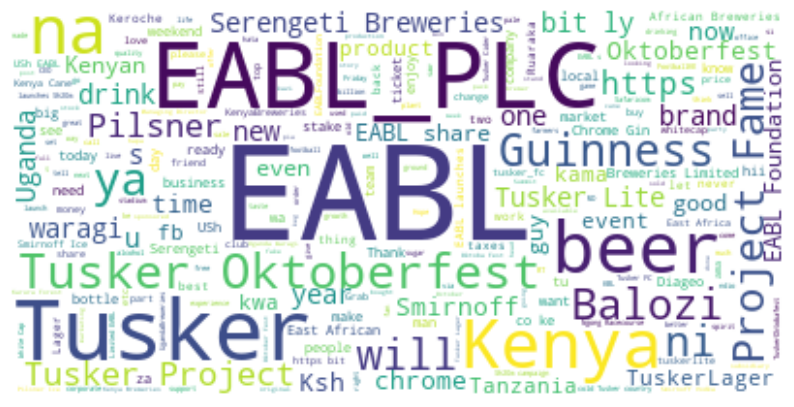

In [48]:
# Define the plot for the wordclouds. 
text = df_model['text'].str.cat(sep=' ')
wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               min_font_size=3,
               max_words=300).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [52]:
df_sentiments.dropna(inplace=True)

### <b><span style='color:#16C2D5'>|</span> Clean tweets</b> 

To perform a sentiment analysis, the text data has to be cleaned to remove links, numbers and other non-textual elemnts leverages the use of **Regular Expressions**. 

In [58]:
# Define a class to clean the twitter data for easier analysis and do a sentiment analysis.  

class CleanTweets:
    def __init__(self, data) -> None:
        self.data = data.copy()
        
    def clean_twitter_data(self):
        # Remove URLs 
        self.data['text'] = self.data['text'].str.replace(r'http\S+', '')
        # Remove mentions 
        self.data['text'] = self.data['text'].str.replace(r'@\S+', '')
        # Remove hashtags 
        self.data['text'] = self.data['text'].str.replace(r'#\S+', '')
        # Remove punctuation 
        self.data['text'] = self.data['text'].str.replace(r'[^\w\s]', '')
        # Remove emojis 
        self.data['text'] = self.data['text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
        # Remove numbers 
        self.data['text'] = self.data['text'].str.replace(r'\d+', '')
        # Remove extra whitespace 
        self.data['text'] = self.data['text'].str.replace(r'\s+', ' ')
        # Remove leading and trailing whitespace 
        self.data['text'] = self.data['text'].str.strip()

class SentimentAnalyzer(CleanTweets):
    def __init__(self, data) -> None:
        super().__init__(data)

    def analyze_sentiment(self):
        # Analyze sentiment using VaderSentiment
        vader = SentimentIntensityAnalyzer()
        self.data['compound'] = self.data['text'].apply(lambda text: vader.polarity_scores(text)['compound'])
        
        self.data['weighted_compound'] = (self.data['compound'] * self.data['No_of_tweets']) + self.data['No_of_likes']

        return self.data

sentiments = SentimentAnalyzer(df_sentiments)
df_model_with_sentiment = sentiments.analyze_sentiment()

In [59]:
sentiments2 = pd.DataFrame(df_model_with_sentiment)
sentiments2.head(20)

,text,Date,No_of_likes,No_of_tweets,compound,weighted_compound
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10,0,1,0.0000,0.0000
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26,0,0,0.0000,0.0000
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12,27,7,-0.4215,24.0495
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23,0,0,0.7644,0.0000
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28,0,0,0.7003,0.0000
5,You should do Balozi,2023-08-27,0,1,0.0000,0.0000
6,Beer should be drank warm to taste the flavour...,2023-06-24,3,2,0.5862,4.1724
7,I was today years old when I learnt Balozi is ...,2023-06-14,1,1,0.0000,1.0000
8,@EABL_PLC send this man a Balozi package bana,2023-05-28,0,1,0.0000,0.0000
9,Whitecap ilisifiwa wakaharibu quality. Sasa wa...,2023-04-04,0,0,0.0000,0.0000


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Modelling</span></b> </div>
Developing an accurate time series model for predicting stock prices requires careful consideration of market predictors that exhibit a strong correlation with the target variables, including Close, High, Low, and Open prices. Factors such as interest rates and inflation rates can significantly influence investor behavior and, consequently, stock prices. 

Our modeling approach will involve leveraging machine learning algorithms to predict pricing of **EABL** stocks. Market indicators data which was already sourced from reputable financial websites as well as the **EABL** website will be preprocessed to ensure data quality and reliability. 

The data sources include:
* **EABL Stock Prices history(EABL website):** [EABL](https://www.eabl.com/share-price-performance)
* **EABL Dividends payout(EABL website):** [Dividends](https://www.eabl.com/share-price-performance)
* **Quarterly inflation rates(World Bank Website):** [Inflation](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG)
* **USD Exchange Rates(CBK website):** [Exchange](https://www.centralbank.go.ke/rates/forex-exchange-rates/)
* **Unemployment rates(MacroTrends website):** [Unemployment](https://www.macrotrends.net/countries/KEN/kenya/unemployment-rate)

All these data were merged on the stock data to give a more wholistic analysis of EABL stock price performance. 


Evaluation of our models will be based on key metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). By integrating these components, we aim to build robust models that capture the dynamics of stock price movements accurately.

In [7]:
# Create a copy of the original dataframe. 
df_modelling = df.copy()

In [8]:
# Re-check the column datatypes. 
df_modelling.dtypes

Unnamed: 0               int64
Date                    object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Average                float64
Volume                   int64
Month                    int64
Year                     int64
Day                      int64
12-Month Inflation     float64
Mean                   float64
Amount                 float64
Dividends per share    float64
Earnings Per Share     float64
Unemployment           float64
Interest rates         float64
dtype: object


### <b> <span style='color:#16C2D5'>|</span>Baseline model</b> 

In [56]:
# baseline model. 
class LinearRegressor:
    def __init__(self, data):
        self.data = data
        self.date_convert()
        self.fill_missing()
        self.split_data()
        self.fit()
        
    def date_convert(self):
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        
    def fill_missing(self):
        self.data['Mean'].fillna(method='ffill', inplace=True)
        self.data[['Dividends per share','Earnings Per Share']] = self.data[['Dividends per share','Earnings Per Share']].fillna(method='bfill')
    
    def split_data(self):
        self.X = self.data.drop(columns=['Date','Close','High','Low','Open'], axis=1)
        self.y = self.data[['High', 'Low', 'Close','Open']]
        self.dates = self.data['Date']
        self.X_train, self.X_test, self.y_train, self.y_test, self.dates_train, self.dates_test = train_test_split(self.X,
                                                                                                                   self.y,
                                                                                                                   self.dates, 
                                                                                                                random_state=42, test_size=0.25)
    def fit(self):
        self.model = MultiOutputRegressor(LinearRegression())
        self.model.fit(self.X_train, self.y_train)
        
    def predict(self):
        return self.model.predict(self.X_test) 
    
    def score(self):
        y_pred = self.predict()
        r2_scores = r2_score(self.y_test, y_pred, multioutput='uniform_average')
        mse = mean_squared_error(self.y_test, y_pred, multioutput='uniform_average')
        return r2_scores, mse
    
    def get_business_days_predictions(self):
        dates_test = self.dates_test.dt.strftime('%Y-%m-%d').values.reshape(-1, 1)
        test_predictions = self.model.predict(self.X_test)
        dates_predictions = pd.DataFrame(np.concatenate((dates_test, test_predictions), axis=1))
        dates_predictions = dates_predictions.sort_values(by=0)
        dates_predictions.columns = ['Date', 'High', 'Low', 'Close', 'Open']
        dates_predictions['Date'] = pd.to_datetime(dates_predictions['Date'])
        business_days = dates_predictions[dates_predictions['Date'].dt.dayofweek < 5]
        return business_days
    
linear_regressor = LinearRegressor(df_modelling)
business_day_predictions = pd.DataFrame(linear_regressor.get_business_days_predictions())
business_day_predictions.head()
business_day_predictions.to_csv("business_day_predictions.csv")
r2_scores, mse = linear_regressor.score()
print("R2 Scores:", r2_scores)
print("Mean Squared Error:", mse)

R2 Scores: 0.9894495666417241
Mean Squared Error: 38.14380232241537


C:\Users\user\AppData\Local\Temp\ipykernel_18484\3435735735.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18484\3435735735.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18484\3435735735.py:15: FutureWarning: DataFrame.fillna with 'me

In [28]:
# targets = ['High', 'Low', 'Close']
# X = df_modelling.drop(columns=['Date','Close','High','Low','Open'], axis=1)
# y = df_modelling[['High', 'Low', 'Close','Open']]
# dates = df_modelling['Date']
# from sklearn.model_selection import train_test_split
# from sklearn.multioutput import MultiOutputRegressor
# import xgboost as xgb 
# from xgboost import XGBRegressor 
# X_train, X_test,y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, random_state=42, test_size=0.25)

# linear_reg_model = LinearRegression()

# multi = MultiOutputRegressor(XGBRegressor())
# multi.fit(X_train, y_train)

# test_predictions = multi.predict(X_test)

# dates_test_str = dates_test.dt.strftime('%Y-%m-%d').values.reshape(-1, 1)
# predictions_with_dates = pd.DataFrame(np.concatenate((dates_test_str, test_predictions), axis=1))
# predictions_with_dates = predictions_with_dates.sort_values(by=0)
# predictions_with_dates.columns = ['Date', 'High', 'Low', 'Close', 'Open']
# predictions_with_dates['Date'] = pd.to_datetime(predictions_with_dates['Date'])
# business_days = predictions_with_dates[predictions_with_dates['Date'].dt.dayofweek < 5]

# test_rmse = mean_squared_error(y_test, test_predictions, squared=False)


# print(f'Test RMSE: {test_rmse:.4f}')
# # print(y_train.shape)
# # predictions_with_dates.head()
# business_days.head()

Test RMSE: 3.5300


,Date,High,Low,Close,Open
673,2006-09-11,141.486206,138.42308,140.790375,139.054886
175,2006-09-12,141.925949,137.641769,141.593719,138.89888
1060,2006-09-21,143.540604,140.906219,141.006149,140.486359
812,2006-09-28,150.304733,144.207855,148.588364,146.91391
13,2006-10-06,155.448654,148.704422,153.582169,152.158081
